In [ ]:
# Importing necessary Classes
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [8]:
## Rescaling the data as the RGB has pixel range of 0-255
train_data_gen = ImageDataGenerator(rescale = 1/255)

In [10]:
## Creating the Training Data set
train_data = train_data_gen.flow_from_directory('../input/is-that-santa-image-classification/is that santa/train',
                                               target_size = (64,64), batch_size= 32, class_mode = 'binary')

Found 614 images belonging to 2 classes.


In [11]:
## Rescaling the data as the RGB has pixel range of 0-255
test_data_gen = ImageDataGenerator(rescale = 1/255)
## Creating the Test Data set
test_data = test_data_gen.flow_from_directory('../input/is-that-santa-image-classification/is that santa/test',
                                             target_size = (64,64), batch_size = 32, class_mode = 'binary')

Found 616 images belonging to 2 classes.


## Building Convulation Neural Network Model

### 1) Initializing CNN

In [12]:
## Ignore the warnings 
cnn = tf.keras.models.Sequential()

2022-11-09 09:59:19.261885: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-09 09:59:19.263034: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-09 09:59:19.592955: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-09 09:59:19.593970: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-09 09:59:19.594824: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

### 2) Adding Convolution Layer

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))

### 3) Adding Pooling Layer

In [14]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

### 4) Add second hidden Layer

In [15]:
# Second Convulation Layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
# Second Pooling Layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

### 5) Flattening

In [16]:
cnn.add(tf.keras.layers.Flatten())

### 6) Full Connection Layer

In [17]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

### 7) Output Layer

In [18]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) 
# Keeping activation as sigmoid, since our classification is binary in nature

### 8) Compiling the Layers

In [19]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

### 9) Training the CNN Model

In [20]:
cnn.fit(x=train_data,validation_data=test_data,epochs=5)

2022-11-09 10:04:04.879585: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005
2022-11-09 10:04:15.701868: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
20/20 [==============================] - 30s 1s/step - loss: 0.7254 - accuracy: 0.5472 - val_loss: 0.5920 - val_accuracy: 0.5844
Epoch 2/5
20/20 [==============================] - 16s 801ms/step - loss: 0.5079 - accuracy: 0.7557 - val_loss: 0.3782 - val_accuracy: 0.8669
Epoch 3/5
20/20 [==============================] - 15s 785ms/step - loss: 0.3460 - accuracy: 0.8795 - val_loss: 0.2868 - val_accuracy: 0.8815
Epoch 4/5
20/20 [==============================] - 16s 821ms/step - loss: 0.2909 - accuracy: 0.8860 - val_loss: 0.2761 - val_accuracy: 0.8912
Epoch 5/5
20/20 [==============================] - 15s 803ms/step - loss: 0.2310 - accuracy: 0.9137 - val_loss: 0.2562 - val_accuracy: 0.8977


### We observe that Accuracy is increasing with every iteration, also loss is decreasing. We can say that our model is performing good.

# Predicting the Data

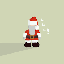

In [25]:
import numpy as np
from keras.preprocessing import image

# Importing a Santa image from the Test dataset to check 
# whether our model is able to accurately predict the image is of Santa or not
val_image = image.load_img('../input/is-that-santa-image-classification/is that santa/test/santa/131.Santa.jpg',target_size=(64,64))
val_image #Confirming whether the image is a Santa

In [26]:
# converting the image to array data
val_image = image.img_to_array(val_image)
# Expanding the dimension of our image array
val_image = np.expand_dims(val_image,axis=0)

In [27]:
# predicting the results based on the test image
result = cnn.predict(val_image)
result

array([[1.]], dtype=float32)

### We observe that we got "1" as our output. Let's check the class indices value to understand what this 1 means.

In [23]:
train_data.class_indices

{'not-a-santa': 0, 'santa': 1}

### We observe that 0 represents not a Santa whereas 1 represents a Santa.
### Since, our model returned 1(is Santa) for a Santa image, we can conclude that our CNN model is performing well. 